In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Cargamos nuestro conjunto de datos

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Validamos valores nulos

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.shape

(150, 5)

Distribución de especies

In [7]:
print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


Visualización de datos
analizando cada atributo
analizando la relación entre los atributos

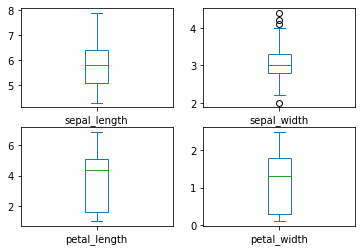

In [9]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Histogramas usando graficos con pandas

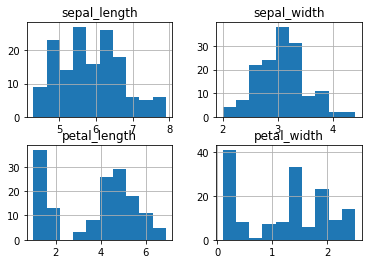

In [10]:
df.hist()
plt.show()

Graficos Multivarianza
Relación entre cada atributo

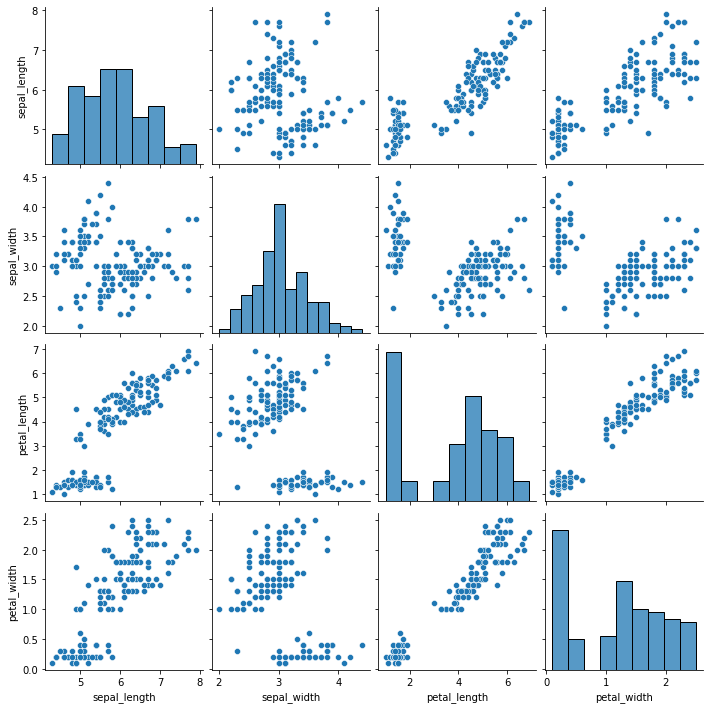

In [11]:
sns.pairplot(df)

Matriz de diagrama de dispersión

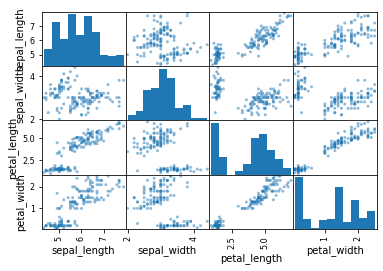

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

Validación de Conjunto de Datos Dividido

In [13]:
array = df.values
X = array[:,0:4]
Y = array[:,4]

In [36]:
#Entrenamiento de Conjunto de Datos
validation_size = 0.33
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)


In [15]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [16]:
logit.fit(X_train, Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print("Rendimiento: ", logit.score(X_validation, Y_validation) * 100, "%")

Rendimiento:  86.66666666666667 %


In [19]:
logit.predict(X_validation)

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [21]:
#Predicción individual
mysample = np.array([4.9,3.0,1.4,0.2,])
ex1 = mysample.reshape(1,-1)
#Remodele sus datos usando array.reshape(-1, 1) si sus datos tienen una sola característica o array.reshape(1, -1) si contiene una sola muestra.

In [22]:
logit.predict(ex1)


array(['setosa'], dtype=object)

Guardando o persistiendo nuestro modelo
Pickle
Joblib
Guardando nuestro modelo usando Pickle

In [23]:
from cgi import test
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres','skin','test','mass','pedi','age','class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# limpiando el modelo en 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
#Gardando el modelo en el disco
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
#algun tiempo despues
#cargando el modelo desde el disco
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
import joblib
joblib.dump(logit, 'logit_model_iris.pkl') 

['logit_model_iris.pkl']

In [26]:
# recargando el modelo
logit_model = joblib.load('logit_model_iris.pkl')

In [27]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [28]:
ex2 = np.array([6.2,3.4,5.4,2.3]).reshape(1,-1)

In [29]:
logit_model.predict(ex2)

array(['virginica'], dtype=object)

Tomamos los modelos para otros algoritmos de ML 

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC() 

In [39]:
# Limpiando el modelo

knn.fit(X_train, Y_train)
print("accuracy :" , knn.score(X_validation,Y_validation))
#Guardando el modelo en el disco
joblib.dump(knn,'knn_model_iris.pkl')

accuracy : 0.6929133858267716


['knn_model_iris.pkl']

In [40]:
dtree.fit(X_train, Y_train)
print("accuracy :" , dtree.score(X_validation,Y_validation))
joblib.dump(dtree, 'dtree_model_iris.pkl')

accuracy : 0.7086614173228346


['dtree_model_iris.pkl']

In [42]:
svm.fit(X_train, Y_train)
print("accuracy :" , svm.score(X_validation,Y_validation))
joblib.dump(svm,'svm_model_iris.pkl')

accuracy : 0.7480314960629921


['svm_model_iris.pkl']